#EDA of reddit Comments, Articles, & Features

To begin our data analysis, we first looked at the three data sets (reddit comments, articles, features) seperately, and then from there we pulled out key components from each data set that we would like to analyze more in depth. The visuals produced were all a part of our thinking process as we digged into each one of the data set to find key features and similarities that may be helpful in our modeling process.

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import nltk
import ast as ast

#Analysis of reddit Comments

In [3]:
import zipfile

with zipfile.ZipFile('train_comments.csv.zip', "r") as z:
    z.extractall("train_comments.csv")

df_com=pd.read_csv("train_comments.csv")
df_com.head()

/Users/jiahui/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,9,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{'toxinalgae': 1.009933774834437, 'cancer': 1...."
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{'delivery': 1.0588235294117647, 'survives': 1..."
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{'tumour': 1.0217391304347827, 'targeting': 1...."
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{'somebody': 1.0517241379310345, 'gold': 1.051..."
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{'delivery': 1.030612244897959, 'title': 1.015..."


##Clean & Edit Data

Here we are simply cleaning up our data by deleting ones that contains nan, as well as adding the time column for better data analysis.

In [3]:
#look for data where there's "nan"
missing_index = df_com['created_utc'].index[df_com['created_utc'].apply(np.isnan)]

In [4]:
missing_index

Int64Index([2295, 2296, 12105, 12106, 27077, 27078, 27079, 27910, 27911, 28721, 28722, 32539, 32540, 33215, 33216, 44529, 44530, 69624, 69625, 88868, 88869, 88870, 109778, 109779, 110506, 110507, 110508, 173931, 173932, 175562, 175563, 175710, 175711, 179208, 179209, 179732, 179733, 179734, 182324, 182325, 203402, 203403, 205261, 205262, 206207, 206208, 214122, 214123, 219465, 219466, 245058, 245059, 263159, 263160, 276731, 276732], dtype='int64')

In [5]:
#Drop all the values that have nan inside 
list1 = []
for index in missing_index:
    list1.append(index)

In [6]:
df_com = df_com.drop(df_com.index[list1])

In [7]:
df_com.shape

(293675, 25)

In [8]:
#function to divide and categorize submission time by 10 min eachvectorizer = CountVectorizer(min_df=0)
import datetime
def convert_time(time):
    Hour = datetime.datetime.fromtimestamp(time).strftime('%H')
    Min = datetime.datetime.fromtimestamp(time).strftime('%M')
    return int(Hour)*6 + (round(int(Min), -1)/10)

In [9]:
#add time column
df_com['time'] = df_com.created_utc.apply(convert_time)

In [23]:
#correct types so information can be read and used
df_com[['ups']] = df_com[['ups']].astype(int)
df_com[['body']] = df_com[['body']].astype(str)
df_com['keywords'] = df_com.keywords.apply(ast.literal_eval)
df_com.drop_duplicates(inplace=True,subset='id')
print df_com.shape
df_com.head()

(275685, 26)


,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,subreddit,ups,pid,tokens,comment_length,n_tokens,keywords,time
0,SirT6,The title sort of misses the point of the stud...,"&lt;div class=""md""&gt;&lt;p&gt;The title sort ...",0,1447279564,1447250764,NaN,0,False,1,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",1359,science,1359,3se6lu,"Counter({'alga': 5, 'cancer': 4, 'cell': 4, 'd...",869,52,"{u'toxinalgae': 1.00993377483, u'cancer': 1.03...",55
1,DrBiochemistry,Just want to point out that until I see a deli...,"&lt;div class=""md""&gt;&lt;p&gt;Just want to po...",0,1447277409,1447248609,NaN,0,False,0,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",3209,science,3209,3se6lu,"Counter({'kill': 2, 'deliveri': 2, 'cancer': 1...",307,30,"{u'survives': 1.02941176471, u'thing': 1.02941...",51
2,Frogblood,It's an interesting idea but the in vitro and ...,"&lt;div class=""md""&gt;&lt;p&gt;It&amp;#39;s an...",0,1447276156,1447247356,NaN,0,False,0,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",133,science,133,3se6lu,"Counter({'idea': 2, 'target': 2, 'overexcit': ...",432,39,"{u'tumour': 1.02173913043, u'targeting': 1.043...",49
3,mijn_ikke,Just waiting until somebody smarter than me co...,"&lt;div class=""md""&gt;&lt;p&gt;Just waiting un...",0,1447275611,1447246811,NaN,0,1447248944.0,1,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",773,science,773,3se6lu,"Counter({'thank': 1, 'gold': 1, 'point': 1, 'e...",163,12,"{u'somebody': 1.05172413793, u'gold': 1.051724...",48
4,awhitt8,Yes the title is sensationalized.\n\n&gt;The m...,"&lt;div class=""md""&gt;&lt;p&gt;Yes the title i...",0,1447284967,1447256167,NaN,0,1447259263.0,0,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,NaN,t3_3se6lu,"{u'kind': u'Listing', u'data': {u'modhash': No...",16,science,16,3se6lu,"Counter({'drug': 5, 'deliveri': 4, 'materi': 3...",1447,104,"{u'silicon': 1.01530612245, u'tissue': 1.01530...",64


#EDA Visuals for reddit Comments

The number of votes needed to break the 95th percentile is...
119.0


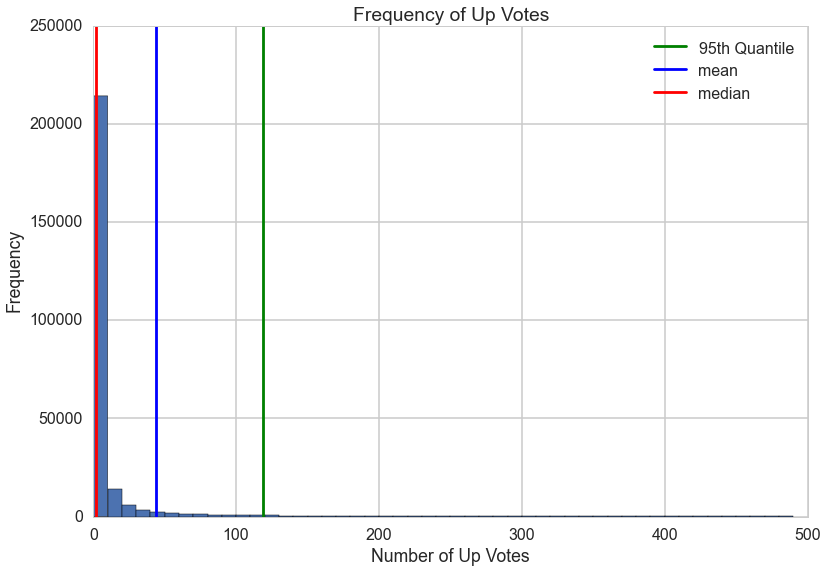

In [24]:
plt.hist(df_com.ups, bins = np.arange(0,500,10))
plt.xlabel('Number of Up Votes')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes")
p95 = np.percentile(df_com.ups, 95)
plt.axvline(p95, color='g', label = '95th Quantile')
plt.axvline(np.average(df_com.ups), label = "mean", c = 'b')
plt.axvline(np.median(df_com.ups) , label = "median", c = 'r')
plt.legend(frameon=False, loc='upper right')
print "The number of votes needed to break the 95th percentile is..." 
print p95

As we see from the frequency of up votes histogram it is clear that the majority of comments get upvotes on the lower end ranging from 0 to 10. We also see that the median is significantly lower than the mean, thus showing that the data is skewed to the right with many outliers bringing the mean up to be higher than its median. Furthermore, we can also see that the 95th percentile is set at 82 votes, thus showing that the top 5% comments have an up vote of 82 or more. These top 5% comments will be the ones we will be most interested in as we continue our search for the best comments that match a certain topic of interest.

#95th Percentile of Data

The following graphs are produced from the data set that makes up the up votes of the 95th percentile and above.

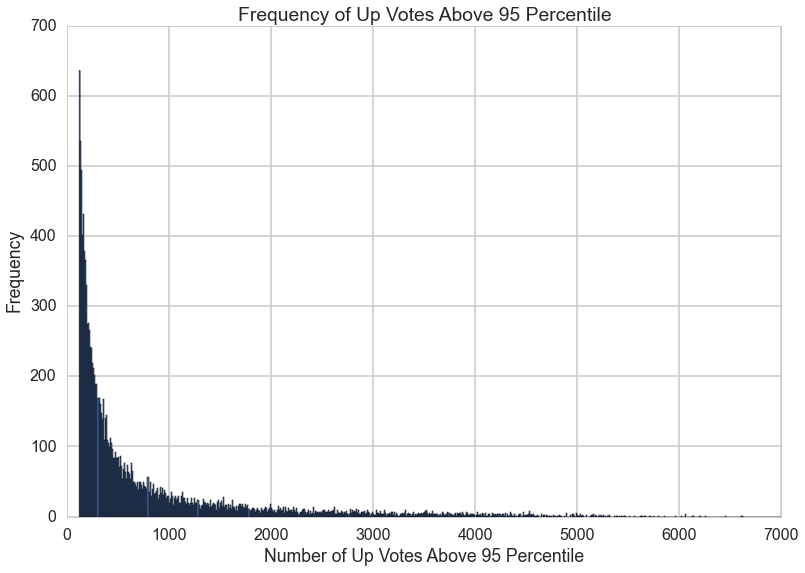

In [33]:
plt.hist(df_com.ups, bins = np.arange(p95,7000,10))
plt.xlabel('Number of Up Votes Above 95 Percentile')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes Above 95 Percentile")

Here we graphed the comments that recieved an up vote of 95 percentile or higher, which is seen here to be 119 up votes or higher. We see here that the frequency of the upvotes decrease rapidly as we get to the higher end of the upvotes, with the 119 up votes having the highest frequency among all others. This is to be expected as very few comments get upvotes into the 1000s range, however, these may be the comments that we are most interested in for our prediction model.

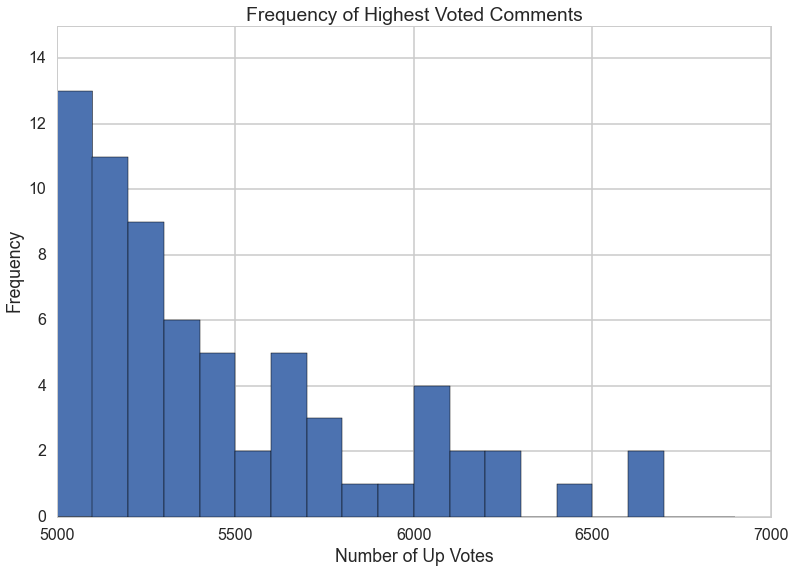

In [36]:
plt.hist(df_com.ups, bins = np.arange(5000,7000,100))
plt.ylim([0,15])
plt.xlabel("Number of Up Votes")
plt.ylabel("Frequency")
plt.title("Frequency of Highest Voted Comments")

Here we have a closer look at the highest up voted comments. As we can see, very few comments recieve up votes pass 5000 with only a handful of comments crossing this mark.

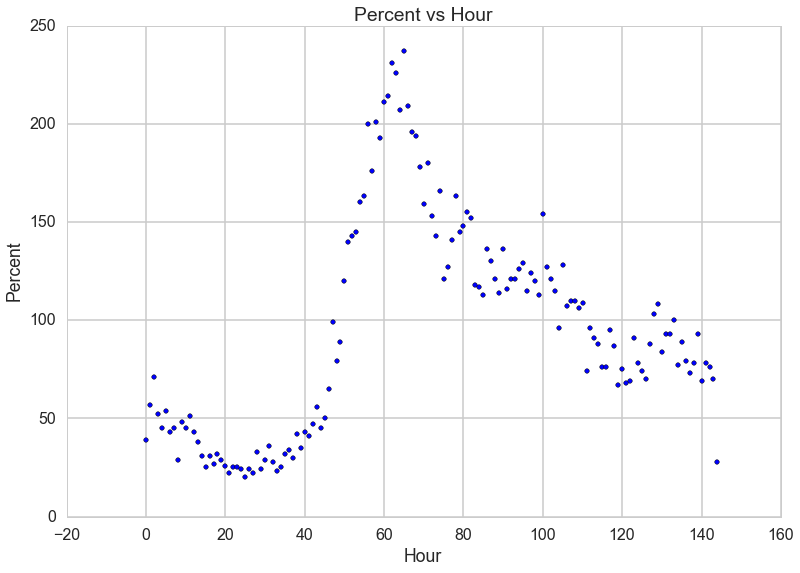

In [59]:
#Filter has only above 95th percentile
filtered = df_com.drop(df_com[df_com.ups < p95].index)

hourlist = []
for i in filtered.time:
    hourlist.append(i)
    
from collections import Counter
x = Counter(hourlist).most_common()

hour = []
percent = []
for h,f in x:
    hour.append(h)
    percent.append(f)
plt.scatter(hour,percent)
plt.ylabel("Percent")
plt.xlabel("Hour")
plt.title("Percent vs Hour")

It is seen here that during the hours between 60 and 70 we have the highest percentage of comments posted from the 95th percentile, thus suggesting that there may be a time of the day where more comments are likely to get up votes than other times. It is also interesting to note that the curve shown above is roughly a very pointy bell curve with the two ends having some of the lowest percentage of 95th percentile comments.

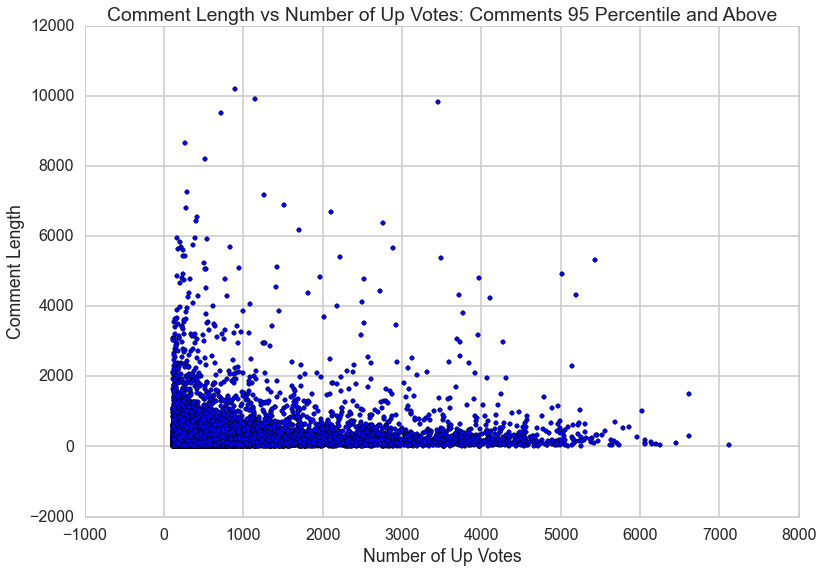

In [62]:
#Filtered for 95 percentile
plt.scatter(filtered.ups, filtered.comment_length)
plt.xlabel("Number of Up Votes")
plt.ylabel("Comment Length")
plt.title("Comment Length vs Number of Up Votes: Comments 95 Percentile and Above")

We see in our comment length versus up votes scatter plot that in general very few comments have comment length above 2000. Furthermore, the most up voted comments tend to keep roughly in the 200 commenth length range, and very few of the top comments are seen to have very high comment length. In fact, the highest comment length tend to have some of the lowest number of votes from the 95 percentile. Thus suggesting that quantity does not mean quality in this case.

<h3>Using Time (for all data points)</h3>

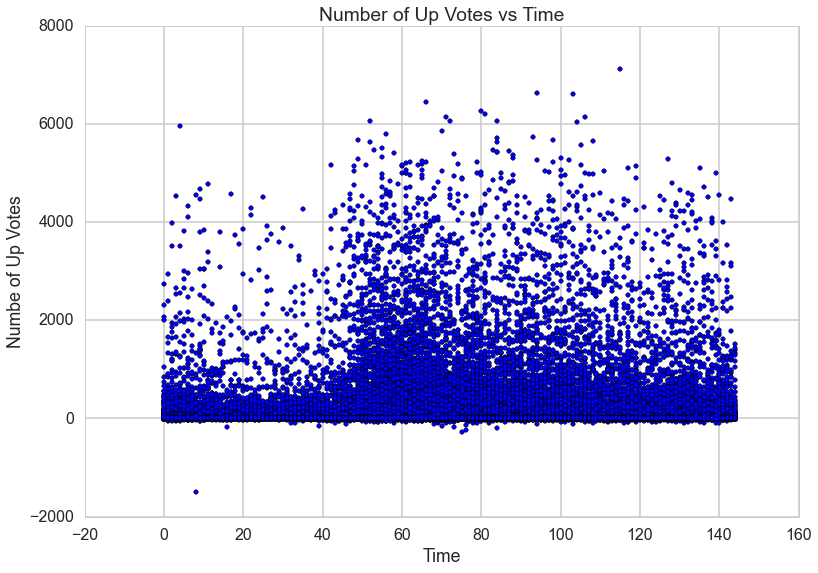

In [44]:
#The following is NOT filtered with the 95th percentile
plt.scatter(df_com.time, df_com.ups)
plt.xlabel("Time")
plt.ylabel("Numbe of Up Votes")
plt.title("Number of Up Votes vs Time")

Here we see a scatter plot of number of up votes versus time. As indicated by the randomly scattered plot there seem to be no correlation between when the comment is posted, and how many up votes the comment gets.

<h3>Grouping Data by Subreddits</h3>

In [46]:
s=df_com.groupby('subreddit').count()
s

,author,body,body_html,controversiality,created,created_utc,distinguished,downs,edited,gilded,id,likes,link_id,name,num_reports,parent_id,replies,score,ups,pid,tokens,comment_length,n_tokens,keywords,time
subreddit,,,,,,,,,,,,,,,,,,,,,,,,,
CanadaPolitics,695,695,695,695,695,695,1,695,695,695,695,0,695,695,0,695,475,695,695,695,695,695,695,695,695
Conservative,1483,1483,1483,1483,1483,1483,5,1483,1483,1483,1483,0,1483,1483,0,1483,788,1483,1483,1483,1483,1483,1483,1483,1483
Documentaries,3892,3892,3892,3892,3892,3892,0,3892,3892,3892,3892,0,3892,3892,0,3892,1647,3892,3892,3892,3892,3892,3892,3892,3892
InternetIsBeautiful,2840,2840,2840,2840,2840,2840,2,2840,2840,2840,2840,0,2840,2840,0,2840,796,2840,2840,2840,2840,2840,2840,2840,2840
Liberal,235,235,235,235,235,235,0,235,235,235,235,0,235,235,0,235,114,235,235,235,235,235,235,235,235
SubredditSimulator,972,972,972,972,972,972,0,972,972,972,972,0,972,972,0,972,358,972,972,972,972,972,972,972,972
UpliftingNews,3376,3376,3376,3376,3376,3376,4,3376,3376,3376,3376,0,3376,3376,0,3376,966,3376,3376,3376,3376,3376,3376,3376,3376
dataisbeautiful,4997,4997,4997,4997,4997,4997,0,4997,4997,4997,4997,0,4997,4997,0,4997,1792,4997,4997,4997,4997,4997,4997,4997,4997
datascience,11,11,11,11,11,11,0,11,11,11,11,0,11,11,0,11,9,11,11,11,11,11,11,11,11


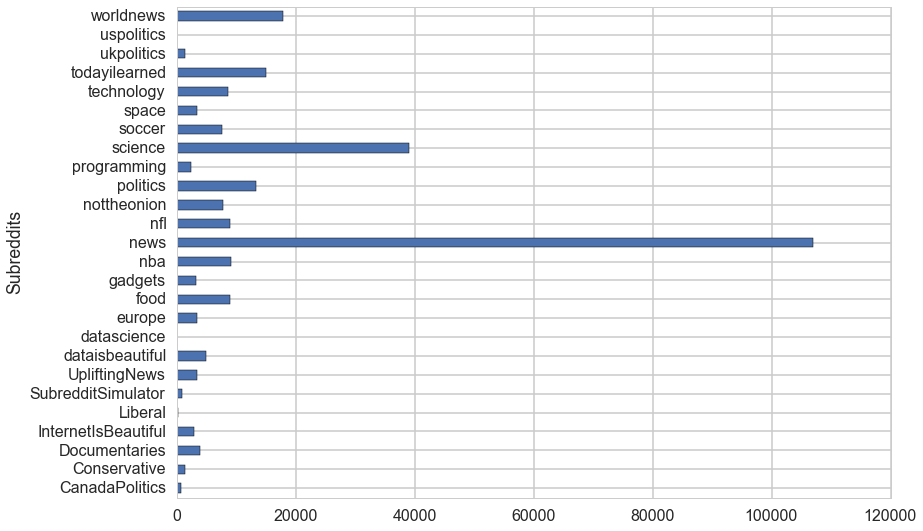

In [57]:
plt.figure()
s.author.plot(kind='barh')
plt.ylabel('Subreddits')

Here we see that for the subreddit categories that we have, news has the highest amount of authors writing in its category followed by science, worldnews, todayilearned, and politics. These subreddits may give us some insights as to what cateogires are popular and where we should target the majority of our prediction model on.

#Article Info Data Analysis

In [64]:
import zipfile

with zipfile.ZipFile('train_articles.csv.zip', "r") as z:
    z.extractall("train_articles.csv")

df_art=pd.read_csv("train_articles.csv")
df_art.head()

,authors,keywords,publish_date,summary,text,url,author,created_utc,domain,downs,gilded,is_self,likes,media,id,num_comments,num_reports,over_18,permalink,score,selftext,subreddit,thumbnail,title,ups,tokens,article_len,n_tokens
0,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6705,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6705,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
1,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6706,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6706,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
2,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'toxic': 1.01308139535, u'cancer': 1.0261627...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6708,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6708,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352
3,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6777,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6777,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626
4,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6772,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6772,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626


#Clean & Edit Data

Here again we take out the data points that have nan in them, as well as add a time column.

In [65]:
#look for data where there's "nan"
missing_index2 = df_art['created_utc'].index[df_art['created_utc'].apply(np.isnan)]

#Drop all the values that have nan inside 
list1 = []
for index in missing_index2:
    list1.append(index)

df_art = df_art.drop(df_art.index[list1])

In [66]:
#function to divide and categorize submission time by 10 min eachvectorizer = CountVectorizer(min_df=0)
import datetime
def convert_time(time):
    Hour = datetime.datetime.fromtimestamp(time).strftime('%H')
    Min = datetime.datetime.fromtimestamp(time).strftime('%M')
    return int(Hour)*6 + (round(int(Min), -1)/10)

#add time column
df_art['time'] = df_art.created_utc.apply(convert_time)

In [67]:
#correct types so information can be read and used
df_art[['text','summary']] = df_art[['text','summary']].astype(str)
df_art.drop_duplicates(inplace=True,subset = 'url')
df_art['keywords'] = df_art.keywords.apply(ast.literal_eval)
print df_art.shape
df_art.head()

(3428, 29)


,authors,keywords,publish_date,summary,text,url,author,created_utc,domain,downs,gilded,is_self,likes,media,id,num_comments,num_reports,over_18,permalink,score,selftext,subreddit,thumbnail,title,ups,tokens,article_len,n_tokens,time
0,"[Derek Keats Flickr, Hannah Osborne, Marc Cirera]","{u'cancer': 1.0261627907, u'drugs': 1.03052325...",2015-11-10 16:00:00+00:00,Algae has been genetically engineered to kill ...,Algae has been genetically engineered to kill ...,http://www.ibtimes.co.uk/algae-genetically-eng...,the_phet,1447239366,ibtimes.co.uk,0,0,False,NaN,NaN,3se6lu,1073,NaN,False,/r/science/comments/3se6lu/algae_has_been_gene...,6705,NaN,science,http://b.thumbs.redditmedia.com/y1CGKgl69hKw-s...,Algae has been genetically engineered to kill ...,6705,"Counter({'alga': 11, 'drug': 9, 'cell': 8, 'ca...",2352,2352,36
3,[],"{u'diamond': 1.04316546763, u'laser': 1.008633...",None,"If Q-carbon is harder than diamond, why would ...","This is a collection of 0.02, 0.03 and 0.04 ca...",http://phys.org/news/2015-11-phase-carbon-diam...,skoalbrother,1448903226,phys.org,0,0,False,NaN,NaN,3uvg0o,2216,NaN,False,/r/science/comments/3uvg0o/researchers_find_ne...,6777,NaN,science,http://b.thumbs.redditmedia.com/hZrhEdBoJp22oE...,"Researchers find new phase of carbon, make dia...",6777,"Counter({'diamond': 21, 'qcarbon': 15, 'carbon...",4626,4626,73
6,[Bjorn Carey],"{u'obfuscation': 1.01181102362, u'fraud': 1.01...",2015-11-16 00:00:00,Stanford researchers uncover patterns in how s...,Stanford researchers uncover patterns in how s...,http://news.stanford.edu/news/2015/november/fr...,godsenfrik,1447707142,news.stanford.edu,0,0,False,NaN,NaN,3t2exx,703,NaN,False,/r/science/comments/3t2exx/when_scientists_fal...,6259,NaN,science,http://b.thumbs.redditmedia.com/FQPskQP8EejVh9...,"When scientists falsify data, they try to cove...",6259,"Counter({'paper': 13, 'research': 11, 'scienti...",4253,4253,95
9,[],"{u'oil': 1.05142857143, u'microbes': 1.0114285...",None,And that leads to more questions about where m...,"Samantha Joye, a professor of marine sciences ...",http://phys.org/news/2015-11-dispersants-oil-d...,avogadros_number,1447107697,phys.org,0,0,False,NaN,NaN,3s6xe6,657,NaN,False,/r/science/comments/3s6xe6/dispersants_did_not...,6146,NaN,science,http://b.thumbs.redditmedia.com/mFQzb4d2QNiyaE...,Dispersants did not help oil degrade in BP spi...,6146,"Counter({'oil': 18, 'dispers': 12, 'joy': 11, ...",3330,3330,104
12,[More From],"{u'star': 1.02124645892, u'forming': 1.0106232...",2015-11-18 06:00:00,"Together, the two observations allowed the sci...",Shares Share\n\nTweet\n\nE-mail\n\n​Of the tho...,http://www.popularmechanics.com/space/deep-spa...,Letmeirkyou,1447869624,popularmechanics.com,0,0,False,NaN,NaN,3tbkv6,580,NaN,False,/r/science/comments/3tbkv6/scientists_have_dis...,6020,NaN,science,http://b.thumbs.redditmedia.com/spD7SnbKlAEY1y...,Scientists have discovered an exoplanet still ...,6020,"Counter({'planet': 22, 'star': 12, 'sallum': 1...",4574,4574,78


#Article Visuals

The number of votes needed to break the 95th percentile is...
6367.6


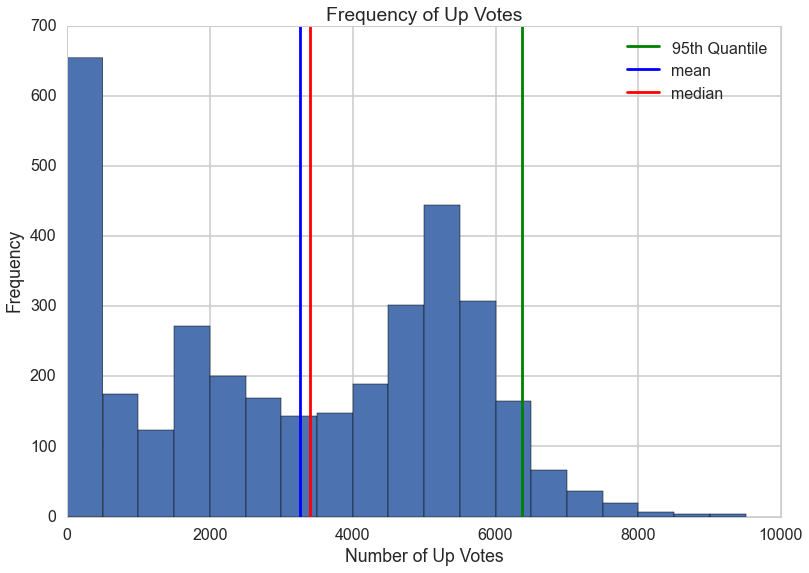

In [73]:
plt.hist(df_art.ups, bins = np.arange(0,10000,500))
plt.xlabel('Number of Up Votes')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes")
p95_art = np.percentile(df_art.ups, 95)
plt.axvline(p95_art, color='g', label = '95th Quantile')
plt.axvline(np.average(df_art.ups), label = "mean", c = 'b')
plt.axvline(np.median(df_art.ups) , label = "median", c = 'r')
plt.legend(frameon=False, loc='upper right')
print "The number of votes needed to break the 95th percentile is..." 
print p95_art

Here we see that unlike the reddit comment up votes, the article comment up votes do not consistently decrease as we get to the higher end of the up votes range. As we se here that the majority of the up votes are in the 1 to 500 range, but there's another small peak closer to the 2000 range, and another higher peak around the 5000 range. Thus, showing that the frequency of up votes do not always decrease when the number of up votes increase for a particular article comment. Furthermore, we can see that the mean is lower than the median, thus suggesting that there are many lower votes that offset the higher votes. We also see here that the number of up votes for an article comment to make it to the 95 percentile cut is 6367.6 up votes, which is significantly higher than the reddit post cut off.

#95th Percentile Data Analysis

The following graphs are produced from the data set that makes up the up votes of the 95th percentile and above.

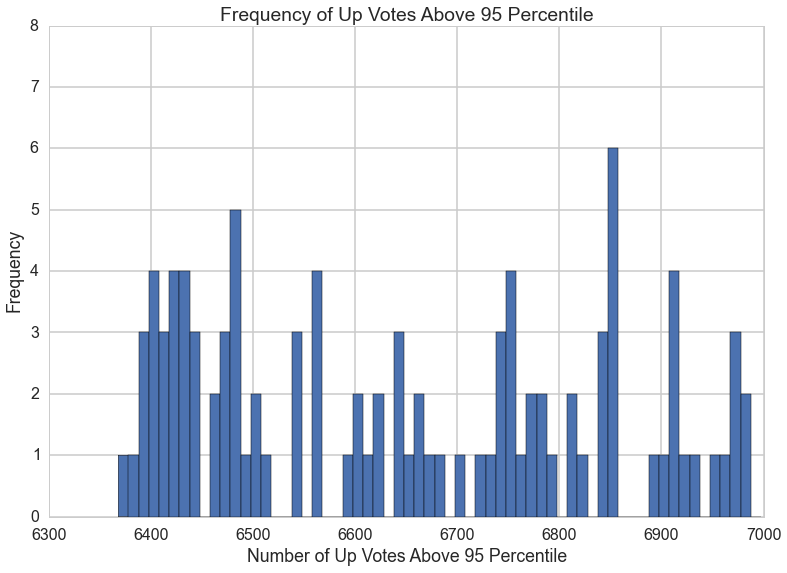

In [76]:
plt.hist(df_art.ups, bins = np.arange(p95_art,7000,10))
plt.ylim([0,8])
plt.xlabel('Number of Up Votes Above 95 Percentile')
plt.ylabel('Frequency')
plt.title("Frequency of Up Votes Above 95 Percentile")

Again, unlike with the reddit comments, for the 95 percentile of articles comments, the frequency of up votes are pretty much even throughout with a lot of ups and downs, as well as inconsistencies. Whereas with the reddit comments, it was clear that as the up votes increase the frequency decrease, this is not the case here. Furthermore, the frequency is also seen to be a lot lower for the 95 percentile here than the reddit comments.

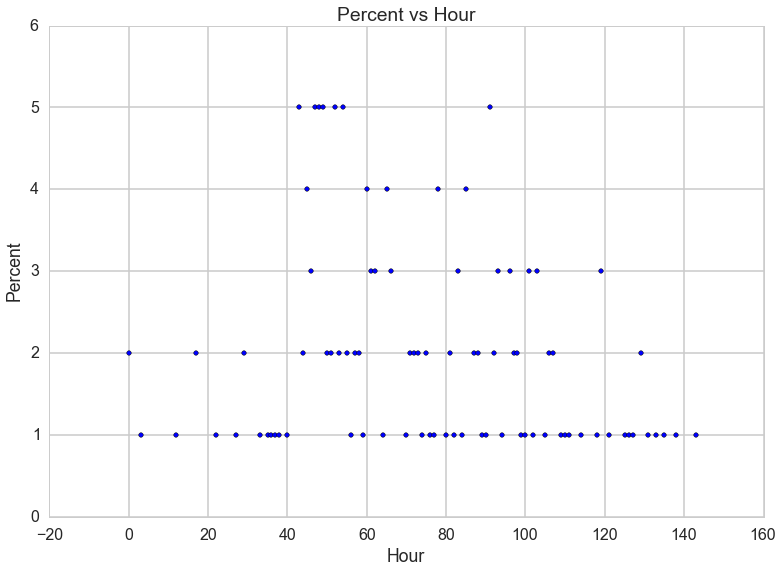

In [77]:
#Filtered has only above 95th percentile
filtered2 = df_art.drop(df_art[df_art.ups < p95].index)

hourlist = []
for i in filtered2.time:
    hourlist.append(i)
    
from collections import Counter
x = Counter(hourlist).most_common()

hour = []
percent = []
for h,f in x:
    hour.append(h)
    percent.append(f)
plt.scatter(hour,percent)
plt.ylabel("Percent")
plt.xlabel("Hour")
plt.title("Percent vs Hour")

Here for the article comments, it can be seen that no apparent correlation exist between percentage of comments in the 95th percentile and above and the time in which the comments were posted. Thus, suggesting that the up votes of popular comments are posted quite randomly, unlike what we saw with the reddit comments. Although it is interesting to note that the highest percentage of highly voted comments are mostly posted in the range of 40 to 60, which is similar to that of the reddit comments.

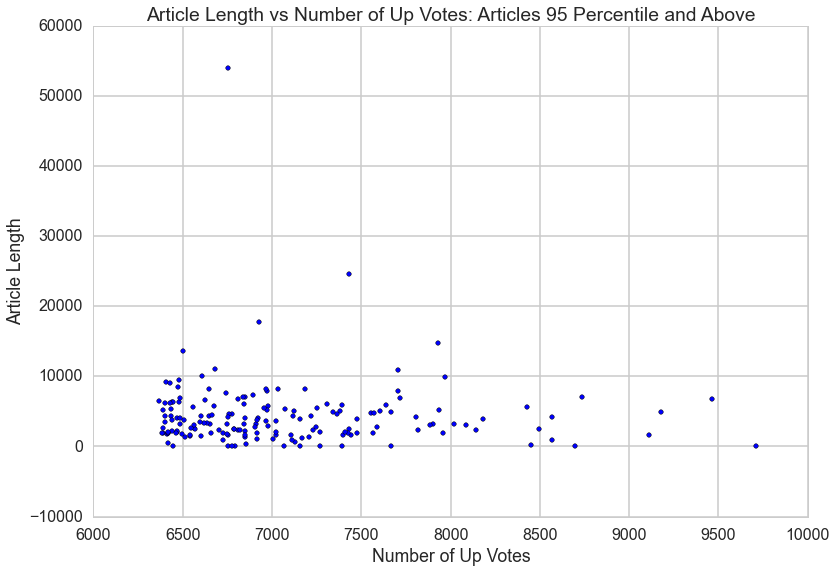

In [79]:
#Filtered for 95 percentile
plt.scatter(filtered2.ups, filtered2.article_len)
plt.xlabel("Number of Up Votes")
plt.ylabel("Article Length")
plt.title("Article Length vs Number of Up Votes: Articles 95 Percentile and Above")

We see here that there is no apparent relationship between the article comment length and the number of up votes as they all seem to stay around the 0 to 10,000 range.

<h3>Using Time (for all data points)</h3>

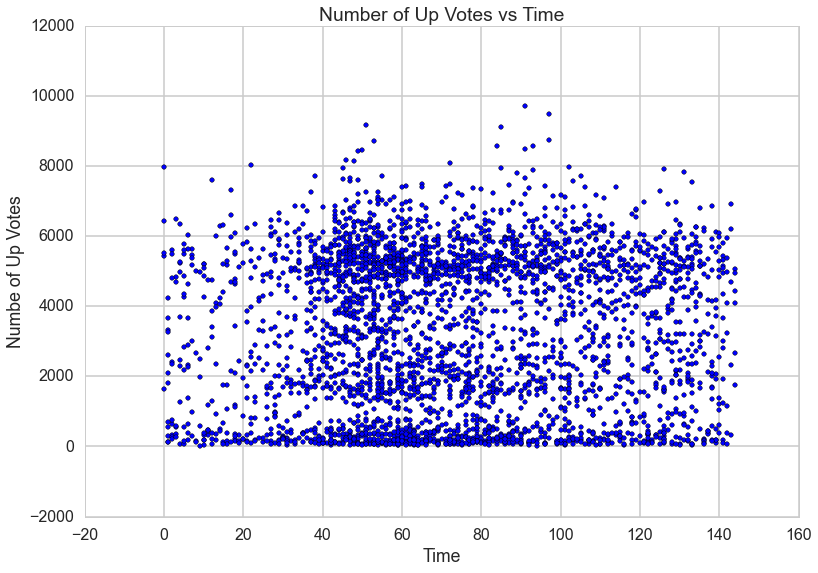

In [83]:
plt.scatter(df_art.time, df_art.ups)
plt.xlabel("Time")
plt.ylabel("Numbe of Up Votes")
plt.title("Number of Up Votes vs Time")

Here we see that unlike the reddit comments, the comments for article number of up votes seem to have some correlation to the time in which it's posted. With high concentration of up votes in the 40 and 80 time range.

<h3>Grouping Data by Subreddits</h3>

In [84]:
s_a=df_art.groupby('subreddit').count()
s_a

,authors,keywords,publish_date,summary,text,url,author,created_utc,domain,downs,gilded,is_self,likes,media,id,num_comments,num_reports,over_18,permalink,score,selftext,thumbnail,title,ups,tokens,article_len,n_tokens,time
subreddit,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CanadaPolitics,91,91,91,91,91,91,91,91,91,91,91,91,0,0,91,91,0,91,91,91,0,91,91,91,91,91,91,91
Conservative,95,95,95,95,95,95,95,95,95,95,95,95,0,4,95,95,0,95,95,95,0,95,95,95,95,95,95,95
Documentaries,97,97,97,97,97,97,97,97,97,97,97,97,0,73,97,97,0,97,97,97,0,97,97,97,97,97,97,97
InternetIsBeautiful,57,57,57,57,57,57,57,57,57,57,57,57,0,0,57,57,0,57,57,57,0,57,57,57,57,57,57,57
Liberal,34,34,34,34,34,34,34,34,34,34,34,34,0,1,34,34,0,34,34,34,0,34,34,34,34,34,34,34
SubredditSimulator,76,76,76,76,76,76,76,76,76,76,76,76,0,15,76,76,0,76,76,76,0,76,76,76,76,76,76,76
UpliftingNews,71,71,71,71,71,71,71,71,71,71,71,71,0,0,71,71,0,71,71,71,0,71,71,71,71,71,71,71
dataisbeautiful,90,90,90,90,90,90,90,90,90,90,90,90,0,14,90,90,0,90,90,90,0,90,90,90,90,90,90,90
datascience,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4,0,4,4,4,0,0,4,4,4,4,4,4


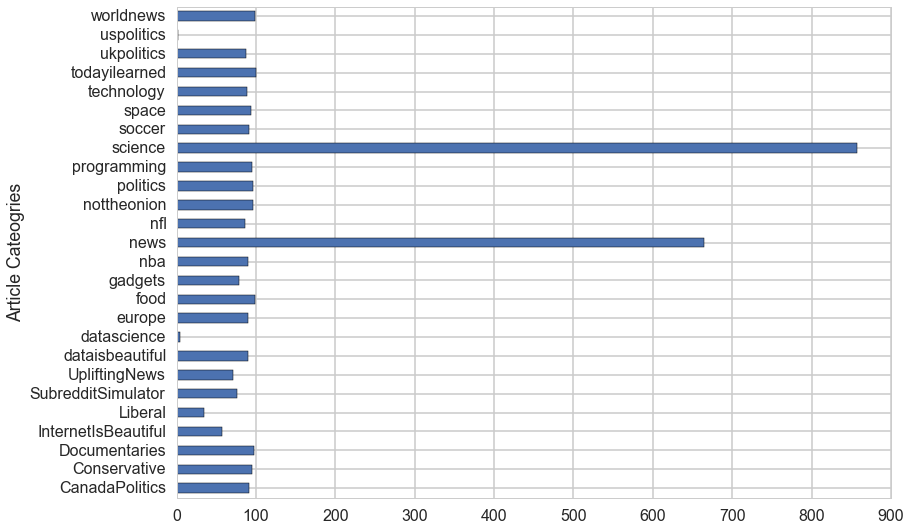

In [85]:
plt.figure()
s_a.author.plot(kind='barh')
plt.ylabel('Article Cateogries')

Here we see that for the article categories that we have, science has the highest amount of authors writing in its category followed by news, todayilearned, worldnews, and food. These article categories are slightly different from that of the subreddits, thus it may give us some insights as to what cateogires we want to target when combining the two for our prediction model.

#Similarities Between reddit Comments & Article 

We picked out the features that we thought would be interesting to look at based on the EDA visuals of the reddit comments and online articles. From there we took the features that we selected from both the reddit comments data set and the articles data set and created a new_sim_features file which contains information on the similarities between the two previous files.

In [7]:
import zipfile

with zipfile.ZipFile('new_sim_features.csv.zip', "r") as z:
    z.extractall("new_sim_features.csv")

df_f=pd.read_csv("new_sim_features.csv")
df_f.head()

/Users/jiahui/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,id,likes,link_id,name,parent_id,score,subreddit,ups,pid,comment_length,n_tokens,keyword_sim,token_sim,user_vocab_tokens,user_vocab_kw
0,cwwhtv7,NaN,t3_3se6lu,t1_cwwhtv7,t3_3se6lu,1359,science,1359,3se6lu,869,52,0.40905,0.537305,0.285789,0.053273
1,cwwgxle,NaN,t3_3se6lu,t1_cwwgxle,t3_3se6lu,3209,science,3209,3se6lu,307,30,0.00000,0.199160,0.199160,0.052972
2,cwwggxu,NaN,t3_3se6lu,t1_cwwggxu,t3_3se6lu,133,science,133,3se6lu,432,39,0.00000,0.178134,0.178134,0.000000
3,cwwga6g,NaN,t3_3se6lu,t1_cwwga6g,t3_3se6lu,773,science,773,3se6lu,163,12,0.00000,0.000000,0.000000,0.000000
4,cwwkopn,NaN,t3_3se6lu,t1_cwwkopn,t3_3se6lu,16,science,16,3se6lu,1447,104,0.00000,0.411233,0.411233,0.088661


<h3>Grouping by Subreddits</h3>

In [8]:
s_f=df_f.groupby('subreddit').count()
s_f

,id,likes,link_id,name,parent_id,score,ups,pid,comment_length,n_tokens,keyword_sim,token_sim,user_vocab_tokens,user_vocab_kw
subreddit,,,,,,,,,,,,,,
CanadaPolitics,695,0,695,695,695,695,695,695,695,695,695,695,695,695
Conservative,1483,0,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
Documentaries,3892,0,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892
InternetIsBeautiful,2840,0,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840
Liberal,235,0,235,235,235,235,235,235,235,235,235,235,235,235
SubredditSimulator,972,0,972,972,972,972,972,972,972,972,972,972,972,972
UpliftingNews,3376,0,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376,3376
dataisbeautiful,4997,0,4997,4997,4997,4997,4997,4997,4997,4997,4997,4997,4997,4997
datascience,11,0,11,11,11,11,11,11,11,11,11,11,11,11


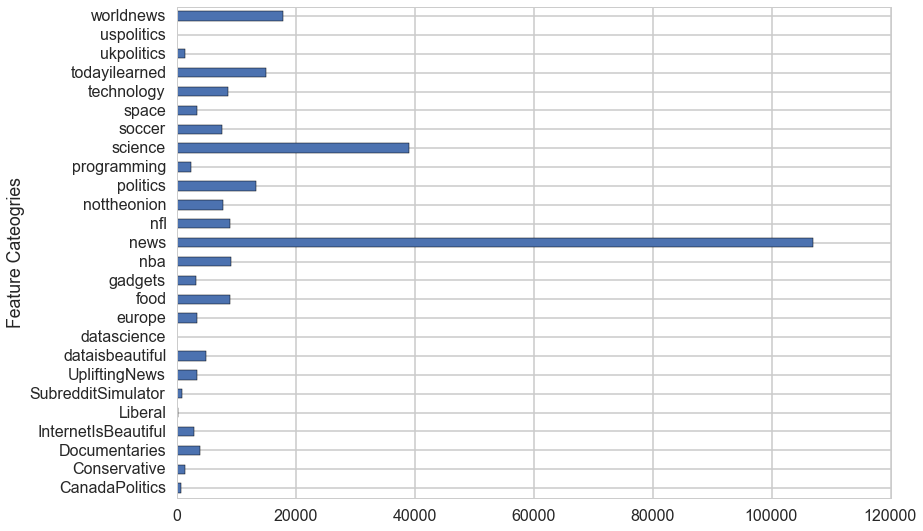

In [9]:
plt.figure()
s_f['id'].plot(kind='barh')
plt.ylabel('Feature Cateogries')

Here we see that the most popular category is news based on the number of ids found under news. Other popular categories include science, world news, todayilearned, and politics. These cateogires may be interesting for us to explore in our later predition model

(array([  1.40570000e+05,   4.38300000e+04,   3.24710000e+04,
          2.25170000e+04,   1.48150000e+04,   9.21900000e+03,
          5.42700000e+03,   3.19300000e+03,   1.67000000e+03,
          9.55000000e+02,   4.88000000e+02,   2.90000000e+02,
          1.28000000e+02,   5.80000000e+01,   2.10000000e+01,
          9.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          4.00000000e+00]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95]),
 <a list of 19 Patch objects>)

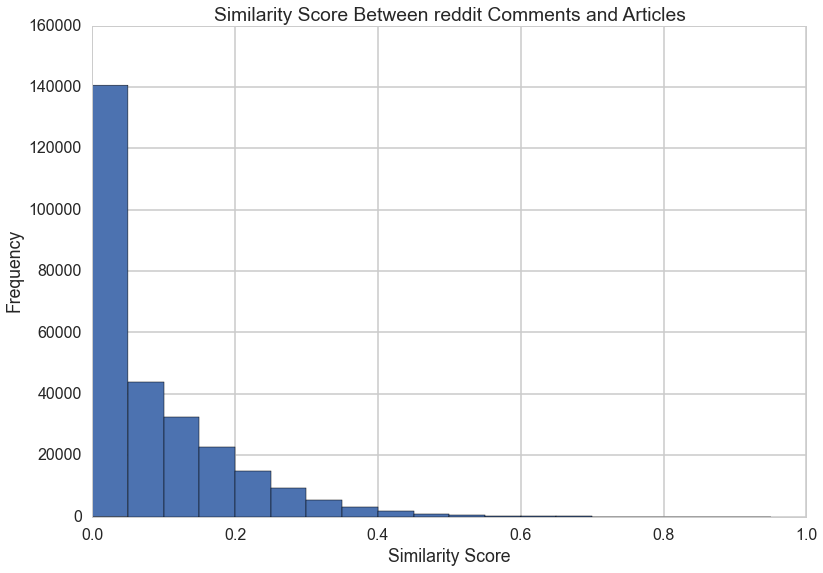

In [18]:
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title("Similarity Score Between reddit Comments and Articles")
plt.hist(df_f.token_sim, bins = np.arange(0,1,.05))

Here we see that the majority of the similarity score between the reddit comments and the article is on the lower end with very fiew making in the 0.4 to 0.6 range. Thus, we can see that similarity calculated between comments based on the tokens (parsed stem words) do not yield high scores.

(array([  1.97080000e+05,   1.19170000e+04,   3.65560000e+04,
          8.97200000e+03,   1.30620000e+04,   2.29000000e+03,
          3.80600000e+03,   7.22000000e+02,   8.87000000e+02,
          1.10000000e+02,   1.91000000e+02,   1.50000000e+01,
          5.10000000e+01,   3.00000000e+00,   5.00000000e+00,
          1.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          7.00000000e+00]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95]),
 <a list of 19 Patch objects>)

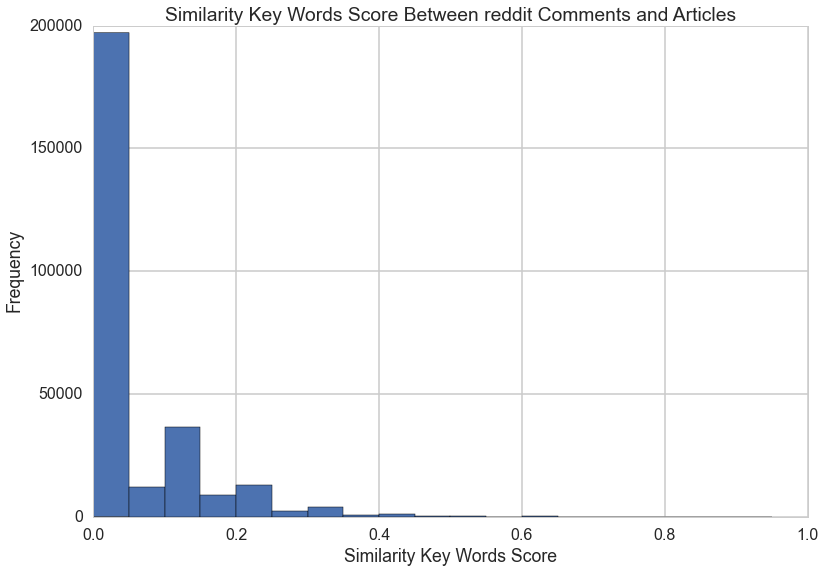

In [19]:
plt.xlabel('Similarity Key Words Score')
plt.ylabel('Frequency')
plt.title("Similarity Key Words Score Between reddit Comments and Articles")
plt.hist(df_f.keyword_sim, bins = np.arange(0,1,.05))

Here we looked at how well the similarity between key words of reddit comments and articles scored. It can be seen from the histogram that, again, the similarity score is not very high with the majority concentrated on the lower end. However, it is interesting to note that when using key words the graph shows a less consistent decrease in frequency as similarity score increases. 